# **HW 4: Ensembel methods**
**HW Due date is 03/18/2025, 23:59 pm**

Objective:
* To understand the basics of Ensembles classifiers.
* To practice building these models using sample datasets.
* To visualize model performance using different metrics.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Cleveland Heart Disease dataset
# Replace 'path_to_your_file.data' with the actual path to your .data file
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv("processed-2.cleveland.data", header=None, delimiter=',', names=names)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Preprocess dataset
data = data.replace('?', np.nan).dropna()
data['target'] = (data['target'] > 0).astype(int) #This line converts the 'HD' column into a binary attribute, where any value greater
 # than 0 is considered as presence of heart disease (1), and 0 otherwise."""

## Your code starts here
X = data.drop(columns=['target'])   #attributes shouldnt incldue the classfication colun
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Your code ends here

# Standardizing the features
## Your code starts here
scaler = StandardScaler()                       #use the standard scaler class to scale the data so feature scaling is not prominent
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Your code ends here

Training Bagging...
Confusion matrix - Bagging:


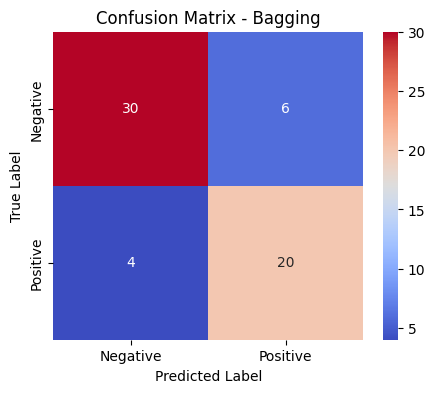

Classification report - Bagging:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.77      0.83      0.80        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



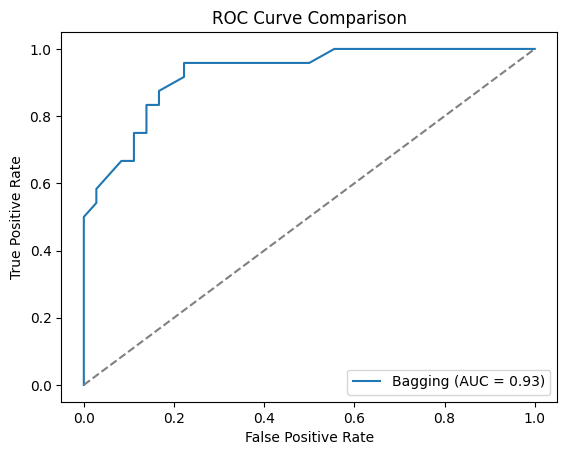

Training AdaBoost...
Confusion matrix - AdaBoost:


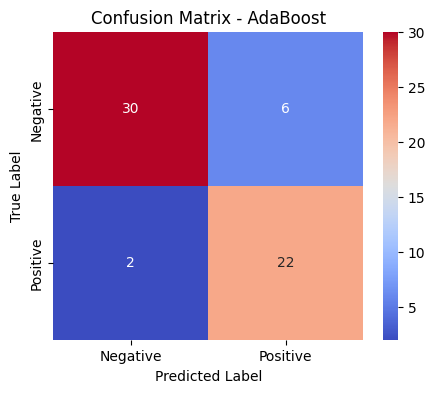

Classification report - AdaBoost:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        36
           1       0.79      0.92      0.85        24

    accuracy                           0.87        60
   macro avg       0.86      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60



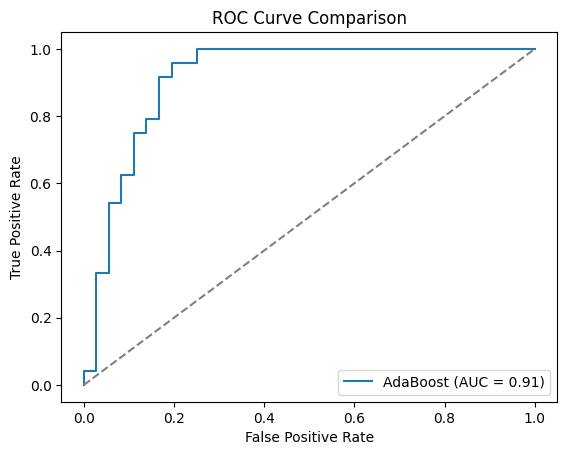

Training Random Forest...
Confusion matrix - Random Forest:


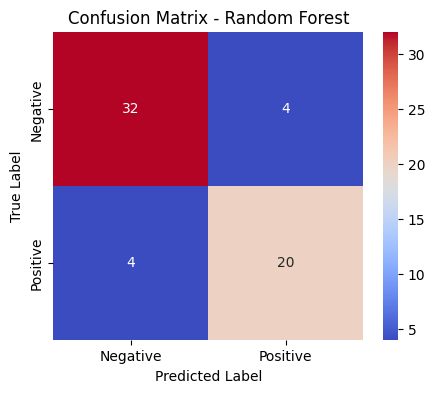

Classification report - Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



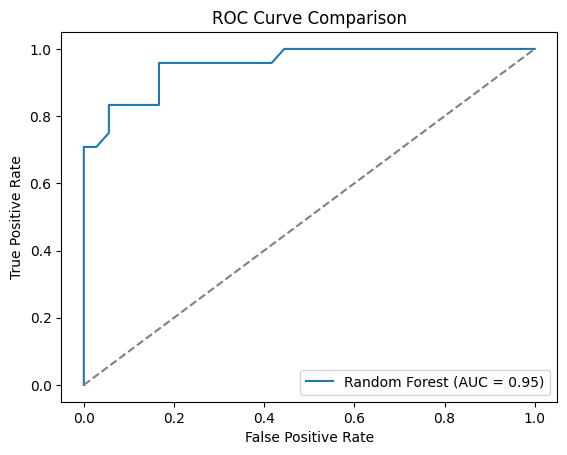

Training XGBoost...
Confusion matrix - XGBoost:


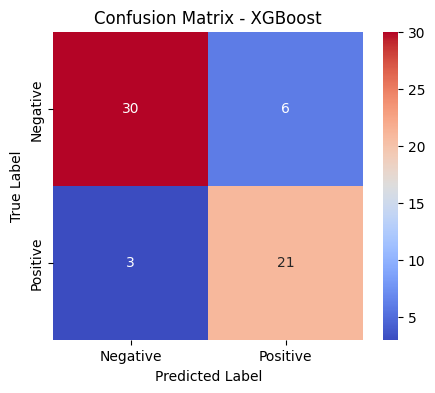

Classification report - XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        36
           1       0.78      0.88      0.82        24

    accuracy                           0.85        60
   macro avg       0.84      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



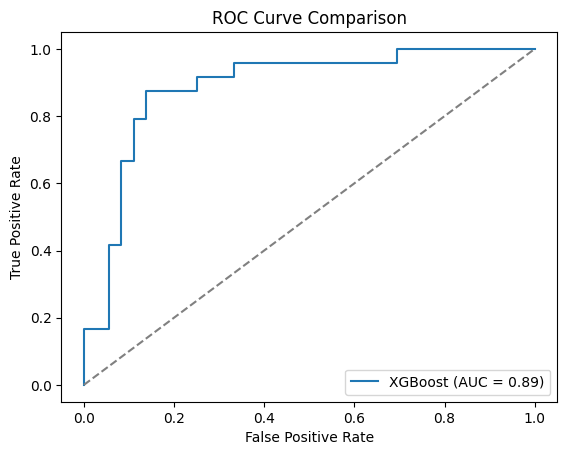

In [4]:
# Define ensemble classifiers
classifiers = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, random_state=42)
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training {name}...")
    ## Your code starts here
    #train and predict for each model
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    ## Your code ends here

    # Compute evaluation metrics
    ## Your code starts here
    print(f"Confusion matrix - {name}:")        #print the confusion matrix to show TP, FP, FN, TN
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print(f"Classification report - {name}:")     #print classification report to show all metrics
    print(classification_report(y_test, y_pred))

    ## Your code ends here

    # Compute ROC curve
    ## Your code starts here
    y_proba = clf.predict_proba(X_test_scaled)[:, 1]  #this gets the probability estimates from prediction which is needed for ROC that uses probabilities
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    ## Your code ends here

    # Plot ROC curve
    ## Your code starts here
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")       #print ROC curve to get a visualization of AUC and performance
    plt.legend()
    plt.show()

    ## Your code ends here

The classification report generated by **scikit-learn's** classification_report function provides a comprehensive summary of the performance of a classifier for each class in a multi-class classification problem. Let's break down the different components of the classification report:

# Precision:

Precision measures the proportion of true positive predictions among all positive predictions made by the classifier for each class.
It is calculated as the ratio of true positives to the sum of true positives and false positives.
Precision is a measure of the classifier's ability to avoid false positives. A higher precision indicates fewer false positives.
#Recall (Sensitivity):

Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions that were correctly identified by the classifier for each class.
It is calculated as the ratio of true positives to the sum of true positives and false negatives.
Recall is a measure of the classifier's ability to capture all positive instances. A higher recall indicates fewer false negatives.
#F1-score:

The F1-score is the harmonic mean of precision and recall.
It provides a balance between precision and recall and is useful for comparing classifiers that have different trade-offs between false positives and false negatives.
The F1-score ranges from 0 to 1, with higher values indicating better overall performance in terms of both precision and recall.
#Support:

Support indicates the number of actual occurrences of each class in the test dataset.
For each class, the support value represents the number of samples belonging to that class in the test dataset.
Support is important for interpreting the reliability of the evaluation metrics (precision, recall, F1-score) for each class. Classes with higher support values have more reliable evaluation metrics because they are based on a larger number of samples.
#Macro Average:

The macro average (macro avg) is the average of the precision, recall, and F1-score calculated for each class separately.
It is obtained by averaging these scores across all classes, giving each class equal weight.
The macro average treats all classes equally, regardless of their size or distribution in the dataset.
It is useful for evaluating the overall performance of the classifier across multiple classes.

In summary, the classification report provides a detailed breakdown of the precision, recall, F1-score, and support for each class, as well as the macro average, allowing for a comprehensive assessment of the classifier's performance in a multi-class classification problem.

In [5]:
# First define a single decision tree classifier
## Your code starts here
single_tree_clf = DecisionTreeClassifier(random_state=42)
single_tree_clf.fit(X_train_scaled, y_train)  # Train the decision tree
y_pred_tree = single_tree_clf.predict(X_test)  # Make predictions

## Your code ends here

# Compare variance reduction by generating the classification report
print("\nVariance Reduction Comparison:")
print("Single Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_tree))  # Print classification report
## Your code starts here

## Your code ends here

for name, clf in classifiers.items():
## Your code starts here
    #for every classifier, train, predict and show metrics for comparison
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"Classification report - {name}:")
    print(classification_report(y_test, y_pred))

## Your code ends here



Variance Reduction Comparison:
Single Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.94      0.80        36
           1       0.82      0.38      0.51        24

    accuracy                           0.72        60
   macro avg       0.76      0.66      0.66        60
weighted avg       0.74      0.72      0.69        60



C:\Users\mattf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Classification report - Bagging:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.77      0.83      0.80        24

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60

Classification report - AdaBoost:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        36
           1       0.79      0.92      0.85        24

    accuracy                           0.87        60
   macro avg       0.86      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60

Classification report - Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.8

**Question:** Explain how using ensemble techniques imporve the classification results in terms of bias and variance?

**Answer:** Bias is the average distance between the actual and the prediction. For classifcation, this is basically just the accuracy. Ensembles improve the accuracy by using more weaker classificaiton models and averaging their results. The idea is that it is more probable for a majority to make a correct classification than a singular one. This shown through AdaBoost accuracy of 83% compared to the singular trees 72%. By taking the average of many models, the variance, which is the spread of guesses, also reduces variance. Complex models tend to overfit and have high variance, but since the ensemble is made up fo less complex models and different training sets, it can have lower variance.

# Submission Guidelines:

* Implement the above steps in a Jupyter Notebook file.
* Save your ipython code and name it as: lastname_firstname_HW4.ipynb (.ipynb extension)
* Include comments and explanations to describe your approach and the rationale behind each step.
* Submit on Canvas.